## World Development Indicators - Analytics

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import Imputer
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

datos = pd.read_csv("suramerica.csv").drop('Unnamed: 0', 1)
datos.head()

CountryName CountryCode  \
0  Antigua and Barbuda         ATG   
1  Antigua and Barbuda         ATG   
2  Antigua and Barbuda         ATG   
3  Antigua and Barbuda         ATG   
4  Antigua and Barbuda         ATG   

                                       IndicatorName   IndicatorCode  Year  \
0  Adolescent fertility rate (births per 1,000 wo...     SP.ADO.TFRT  1960   
1  Age dependency ratio (% of working-age populat...     SP.POP.DPND  1960   
2  Age dependency ratio, old (% of working-age po...  SP.POP.DPND.OL  1960   
3  Age dependency ratio, young (% of working-age ...  SP.POP.DPND.YG  1960   
4               Birth rate, crude (per 1,000 people)  SP.DYN.CBRT.IN  1960   

        Value  
0  126.144000  
1   88.237117  
2    7.779958  
3   80.457159  
4   32.920000

In [17]:
start_time = time.time()

paises = ['Antigua and Barbuda','Argentina','Aruba','Bahamas, The','Barbados','Belize','Bolivia','Brazil','Cayman Islands','Chile','Colombia','Costa Rica','Cuba','Curacao','Dominica','Dominican Republic','Ecuador','El Salvador','Grenada','Guatemala','Guyana','Haiti','Honduras','Jamaica','Mexico','Nicaragua','Panama','Paraguay','Peru','Puerto Rico','Sint Maarten (Dutch part)','St. Kitts and Nevis','St. Lucia','St. Martin (French part)','St. Vincent and the Grenadines','Suriname','Trinidad and Tobago','Turks and Caicos Islands','Uruguay','Venezuela, RB','Virgin Islands (U.S.)']
indicators = ['GDP (constant LCU)','GDP (current LCU)','GDP (current US$)','GDP at market prices (constant 2010 US$)','GDP deflator (base year varies by country)','GDP growth (annual %)','GDP per capita (constant 2010 US$)','GDP per capita (constant LCU)','GDP per capita (current LCU)','GDP per capita (current US$)','GDP per capita growth (annual %)','GDP per capita, PPP (constant 2011 international $)','GDP per capita, PPP (current international $)','GDP, PPP (constant 2011 international $)','GDP, PPP (current international $)']
years = range(2008,2012+1)

tabla = pd.DataFrame.pivot_table(datos, values='Value', index=['CountryName', 'Year'], columns=['IndicatorName']).loc[(paises,years),indicators]

print("--- %s seconds ---" % (time.time() - start_time))

tabla

--- 1.90299987793 seconds ---


IndicatorName                  GDP (constant LCU)  GDP (current LCU)  \
CountryName              Year                                          
Antigua and Barbuda      2008        3.358406e+09       3.637845e+09   
                         2009        2.954188e+09       3.257308e+09   
                         2010        2.743171e+09       3.065955e+09   
                         2011        2.693974e+09       3.050780e+09   
                         2012        2.802259e+09       3.252725e+09   
Argentina                2008        7.058647e+11       1.283906e+12   
                         2009        7.062178e+11       1.411526e+12   
                         2010        7.729666e+11       1.810830e+12   
                         2011        8.377910e+11       2.312009e+12   
                         2012        8.445081e+11       2.765575e+12   
Aruba                    2008        3.293180e+09       4.997610e+09   
                         2009        3.107000e+09       4.473090e+09   
                         2010                 NaN       4.417190e+09   
                         2011                 NaN       4.626190e+09   
                         2012                 NaN                NaN   
Bahamas, The             2008        7.893019e+09       8.246650e+09   
                         2009        7.563465e+09       7.820420e+09   
                         2010        7.679850e+09       7.909580e+09   
                         2011        7.726920e+09       7.889750e+09   
                         2012        7.898250e+09       8.234470e+09   
Barbados                 2008        1.141000e+09       9.190000e+09   
                         2009        1.095000e+09       9.204000e+09   
                         2010        1.098000e+09       8.891000e+09   
                         2011        1.106000e+09       8.716000e+09   
                         2012        1.109000e+09       8.626000e+09   
Belize                   2008        2.353310e+09       2.737250e+09   
                         2009        2.370095e+09       2.673914e+09   
                         2010        2.448874e+09       2.794227e+09   
                         2011        2.500397e+09       2.974011e+09   
                         2012        2.596031e+09       3.147735e+09   
...                                           ...                ...   
Suriname                 2008        8.395000e+09       9.698000e+09   
                         2009        8.648000e+09       1.063800e+10   
                         2010        9.094000e+09       1.199300e+10   
                         2011        9.573000e+09       1.445200e+10   
                         2012        9.867000e+09       1.643400e+10   
Trinidad and Tobago      2008        9.292100e+10       1.752870e+11   
                         2009        8.884200e+10       1.212810e+11   
                         2010        8.875900e+10       1.341250e+11   
                         2011        8.876500e+10       1.564500e+11   
                         2012        8.997800e+10       1.580450e+11   
Turks and Caicos Islands 2008                 NaN                NaN   
                         2009                 NaN                NaN   
                         2010                 NaN                NaN   
                         2011                 NaN                NaN   
                         2012                 NaN                NaN   
Uruguay                  2008        5.052072e+11       6.361509e+11   
                         2009        5.266457e+11       7.145234e+11   
                         2010        5.677420e+11       8.080785e+11   
                         2011        5.970496e+11       9.263561e+11   
                         2012        6.168902e+11       1.043637e+12   
Venezuela, RB            2008        5.852507e+10       6.775936e+11   
                         2009        5.665092e+10       7.072625e+11   
                         2010        5.5

In [7]:
def splitter(tab,y_indicator):
    # Asignamos X e y, eliminando la columna y en X
    X = np.delete(tab[:,:], y_indicator, 1)
    y = tab[:,y_indicator]
    # Separamos Train y Test respectivamente para X e y
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    return X_train, X_test, y_train, y_test

In [8]:
def r2(y_true, y_predict):
    return r2_score(y_true, y_predict)

In [9]:
def DTR(X_train, X_test, y_train, y_test):
    estimator = DecisionTreeRegressor()
    estimator.fit(X_train,y_train)
    y_predict = estimator.predict(X_test)
    R2_test = r2(y_test,y_predict)
    return R2_test, y_test , y_predict

In [34]:
def imputador(tab):
    impute=Imputer(missing_values="NaN",strategy='mean',axis=0)
    impute.fit(tab)
    tabla_imputada=impute.transform(tab)
    return tabla_imputada

In [106]:
def Grid_Search_CV(X_train, y_train):
    cv = ShuffleSplit(X_train.shape[0], n_iter = 10, test_size=0.2)
    estimator = DecisionTreeRegressor()
    params = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'splitter': ['best', 'random']}

    grid = GridSearchCV(estimator, params, cv=cv, scoring="r2")

    grid.fit(X_train, y_train)
    
    return grid.best_estimator_

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import ShuffleSplit
def fit_model(X, y):
    # Setting parameters for GridSearchCV 
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.2, random_state = 2)
    regressor = DecisionTreeRegressor()
    params = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'splitter': ['best', 'random']}
    scoring_func = make_scorer(performance_metric)
    
    # Create GridSearch object
    grid = GridSearchCV(regressor, params, cv = cv_sets, scoring = scoring_func)
    
    # Fit GridSearch object to the data
    grid = grid.fit(X, y)
    
    # Return best estimator using inbuilt method
    return grid.best_estimator_

In [108]:
def Grid_Search_CV_v3(X_train, y_train):
    
    estimator = DecisionTreeRegressor()
    params = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'splitter': ['best', 'random']}
    grid = GridSearchCV(estimator, params, cv=10, scoring="r2")
    grid.fit(X_train, y_train)
    
    return grid.best_estimator_

In [151]:
from sklearn.metrics import make_scorer
def Grid_Search_CV_v5(X_train, y_train):
    cv = ShuffleSplit(X_train.shape[0], n_iter = 10, test_size=0.2)
    estimator = DecisionTreeRegressor()
    params = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'splitter': ['best', 'random']}
    
    grid = GridSearchCV(estimator, params, cv=cv, scoring='r2')

    grid.fit(X_train, y_train)
    
    return grid.best_estimator_

In [152]:
from sklearn.metrics import make_scorer
def Grid_Search_CV_v6(X_train, y_train):
    cv = ShuffleSplit(X_train.shape[0], n_iter = 10, test_size=0.2, random_state=0)
    estimator = DecisionTreeRegressor()
    params = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'splitter': ['best', 'random']}
    
    
    grid = GridSearchCV(estimator, params, cv=cv, scoring='r2')

    grid.fit(X_train, y_train)
    
    return grid.best_estimator_

In [140]:
from sklearn.metrics import make_scorer
def Grid_Search_CV_v8(X_train, y_train):
    cv = ShuffleSplit(X_train.shape[0], n_iter = 10, test_size=0.2)
    estimator = DecisionTreeRegressor()
    params = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'splitter': ['best', 'random']}
    scoring_func = make_scorer(r2)
    
    grid = GridSearchCV(estimator, params, cv=cv, scoring=scoring_func)

    grid.fit(X_train, y_train)
    
    return grid.best_estimator_ 

In [141]:
from sklearn.metrics import make_scorer
def Grid_Search_CV_v9(X_train, y_train):
    cv = ShuffleSplit(X_train.shape[0], n_iter = 10, test_size=0.2, random_state=0)
    estimator = DecisionTreeRegressor()
    params = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'splitter': ['best', 'random']}
    scoring_func = make_scorer(r2)
    
    grid = GridSearchCV(estimator, params, cv=cv, scoring=scoring_func)

    grid.fit(X_train, y_train)
    
    return grid.best_estimator_ 

In [ ]:
from sklearn.metrics import make_scorer
def Grid_Search_CV_v7(X_train, y_train):
    cv = ShuffleSplit(X_train.shape[0], n_iter = 10, test_size=0.2, random_state=0)
    estimator = DecisionTreeRegressor()
    params = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'splitter': ['best', 'random']}
    
    grid = GridSearchCV(estimator, params, cv=cv, scoring=r2_score)

    grid.fit(X_train, y_train)
    
    return grid.best_estimator_

In [12]:
def trial(tab,y_indicator):
    X_train, X_test, y_train, y_test = splitter(tab,y_indicator)
    grid , best_max_depth, best_estimator = Grid_Search_CV_v2(X_train, y_train)
    y_predict_optimunGrid = best_estimator.predict(X_test)
    print r2(y_test,y_predict_optimunGrid)
    return pd.DataFrame(zip(*[y_test,y_predict_optimunGrid]))

In [35]:
tabla_zeros = pd.DataFrame(tabla).fillna(value=0)
tabla_imputada = imputador(tabla)

In [37]:
pd.DataFrame(tabla_zeros)

IndicatorName                  GDP (constant LCU)  GDP (current LCU)  \
CountryName              Year                                          
Antigua and Barbuda      2008        3.358406e+09       3.637845e+09   
                         2009        2.954188e+09       3.257308e+09   
                         2010        2.743171e+09       3.065955e+09   
                         2011        2.693974e+09       3.050780e+09   
                         2012        2.802259e+09       3.252725e+09   
Argentina                2008        7.058647e+11       1.283906e+12   
                         2009        7.062178e+11       1.411526e+12   
                         2010        7.729666e+11       1.810830e+12   
                         2011        8.377910e+11       2.312009e+12   
                         2012        8.445081e+11       2.765575e+12   
Aruba                    2008        3.293180e+09       4.997610e+09   
                         2009        3.107000e+09       4.473090e+09   
                         2010        0.000000e+00       4.417190e+09   
                         2011        0.000000e+00       4.626190e+09   
                         2012        0.000000e+00       0.000000e+00   
Bahamas, The             2008        7.893019e+09       8.246650e+09   
                         2009        7.563465e+09       7.820420e+09   
                         2010        7.679850e+09       7.909580e+09   
                         2011        7.726920e+09       7.889750e+09   
                         2012        7.898250e+09       8.234470e+09   
Barbados                 2008        1.141000e+09       9.190000e+09   
                         2009        1.095000e+09       9.204000e+09   
                         2010        1.098000e+09       8.891000e+09   
                         2011        1.106000e+09       8.716000e+09   
                         2012        1.109000e+09       8.626000e+09   
Belize                   2008        2.353310e+09       2.737250e+09   
                         2009        2.370095e+09       2.673914e+09   
                         2010        2.448874e+09       2.794227e+09   
                         2011        2.500397e+09       2.974011e+09   
                         2012        2.596031e+09       3.147735e+09   
...                                           ...                ...   
Suriname                 2008        8.395000e+09       9.698000e+09   
                         2009        8.648000e+09       1.063800e+10   
                         2010        9.094000e+09       1.199300e+10   
                         2011        9.573000e+09       1.445200e+10   
                         2012        9.867000e+09       1.643400e+10   
Trinidad and Tobago      2008        9.292100e+10       1.752870e+11   
                         2009        8.884200e+10       1.212810e+11   
                         2010        8.875900e+10       1.341250e+11   
                         2011        8.876500e+10       1.564500e+11   
                         2012        8.997800e+10       1.580450e+11   
Turks and Caicos Islands 2008        0.000000e+00       0.000000e+00   
                         2009        0.000000e+00       0.000000e+00   
                         2010        0.000000e+00       0.000000e+00   
                         2011        0.000000e+00       0.000000e+00   
                         2012        0.000000e+00       0.000000e+00   
Uruguay                  2008        5.052072e+11       6.361509e+11   
                         2009        5.266457e+11       7.145234e+11   
                         2010        5.677420e+11       8.080785e+11   
                         2011        5.970496e+11       9.263561e+11   
                         2012        6.168902e+11       1.043637e+12   
Venezuela, RB            2008        5.852507e+10       6.775936e+11   
                         2009        5.665092e+10       7.072625e+11   
                         2010        5.5

## Eliminamos los indicadores que no tienen registros (Columnas en Zero)

In [49]:
tabla_zeros_2 = tabla_zeros.loc[:, (tabla_zeros != 0).any(axis=0)]
tabla_zeros_2

IndicatorName                  GDP (constant LCU)  GDP (current LCU)  \
CountryName              Year                                          
Antigua and Barbuda      2008        3.358406e+09       3.637845e+09   
                         2009        2.954188e+09       3.257308e+09   
                         2010        2.743171e+09       3.065955e+09   
                         2011        2.693974e+09       3.050780e+09   
                         2012        2.802259e+09       3.252725e+09   
Argentina                2008        7.058647e+11       1.283906e+12   
                         2009        7.062178e+11       1.411526e+12   
                         2010        7.729666e+11       1.810830e+12   
                         2011        8.377910e+11       2.312009e+12   
                         2012        8.445081e+11       2.765575e+12   
Aruba                    2008        3.293180e+09       4.997610e+09   
                         2009        3.107000e+09       4.473090e+09   
                         2010        0.000000e+00       4.417190e+09   
                         2011        0.000000e+00       4.626190e+09   
                         2012        0.000000e+00       0.000000e+00   
Bahamas, The             2008        7.893019e+09       8.246650e+09   
                         2009        7.563465e+09       7.820420e+09   
                         2010        7.679850e+09       7.909580e+09   
                         2011        7.726920e+09       7.889750e+09   
                         2012        7.898250e+09       8.234470e+09   
Barbados                 2008        1.141000e+09       9.190000e+09   
                         2009        1.095000e+09       9.204000e+09   
                         2010        1.098000e+09       8.891000e+09   
                         2011        1.106000e+09       8.716000e+09   
                         2012        1.109000e+09       8.626000e+09   
Belize                   2008        2.353310e+09       2.737250e+09   
                         2009        2.370095e+09       2.673914e+09   
                         2010        2.448874e+09       2.794227e+09   
                         2011        2.500397e+09       2.974011e+09   
                         2012        2.596031e+09       3.147735e+09   
...                                           ...                ...   
Suriname                 2008        8.395000e+09       9.698000e+09   
                         2009        8.648000e+09       1.063800e+10   
                         2010        9.094000e+09       1.199300e+10   
                         2011        9.573000e+09       1.445200e+10   
                         2012        9.867000e+09       1.643400e+10   
Trinidad and Tobago      2008        9.292100e+10       1.752870e+11   
                         2009        8.884200e+10       1.212810e+11   
                         2010        8.875900e+10       1.341250e+11   
                         2011        8.876500e+10       1.564500e+11   
                         2012        8.997800e+10       1.580450e+11   
Turks and Caicos Islands 2008        0.000000e+00       0.000000e+00   
                         2009        0.000000e+00       0.000000e+00   
                         2010        0.000000e+00       0.000000e+00   
                         2011        0.000000e+00       0.000000e+00   
                         2012        0.000000e+00       0.000000e+00   
Uruguay                  2008        5.052072e+11       6.361509e+11   
                         2009        5.266457e+11       7.145234e+11   
                         2010        5.677420e+11       8.080785e+11   
                         2011        5.970496e+11       9.263561e+11   
                         2012        6.168902e+11       1.043637e+12   
Venezuela, RB            2008        5.852507e+10       6.775936e+11   
                         2009        5.665092e+10       7.072625e+11   
                         2010        5.5

In [14]:
def DTR_v2(X_train, X_test, y_train, y_test, depth):
    estimator = DecisionTreeRegressor(max_depth=depth)
    estimator.fit(X_train,y_train)
    y_predict = estimator.predict(X_test)
    R2_test = r2(y_test,y_predict)
    return R2_test

## Iteramos para todos los indicadores

In [50]:
R2_global = list()

for i in range(0,np.shape(tabla_imputada)[1]):
    ## Zeros
    X_train, X_test, y_train, y_test = splitter(np.array(tabla_zeros_2),i)
    grid,best_max_depth, grid_best_estimator = Grid_Search_CV(X_train, y_train)
    R2_Original_GridSearchCV = DTR_v2(X_train, X_test, y_train, y_test,best_max_depth)
    
    ## Imputado
    X_train, X_test, y_train, y_test = splitter(np.array(tabla_imputada),i)
    grid,best_max_depth, grid_best_estimator = Grid_Search_CV(X_train, y_train)
    R2_Imputado_GridSearchCV = DTR_v2(X_train, X_test, y_train, y_test,best_max_depth)
    
    # Recopilamos los R2
    R2_global.append([R2_Original_GridSearchCV,R2_Imputado_GridSearchCV])

pd.DataFrame(R2_global,columns=['Original','Imputado'])

Original  Imputado
0   0.992146  0.998370
1   0.974419  0.987050
2   0.732686  0.671960
3   0.944933  0.950609
4   0.993715  0.992685
5   0.996817  0.987347
6   0.729993  0.867088
7   0.922499  0.956780
8   0.995623  0.934574
9   0.997149  0.995276
10  0.994578  0.998551
11  0.990640  0.981280

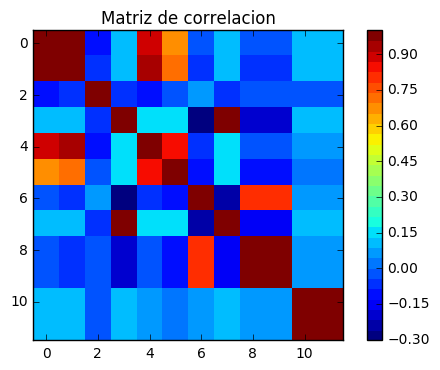

In [15]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    plt.title('Matriz de correlacion')
    fig.colorbar(cax)
    plt.show()

correlation_matrix(pd.DataFrame(tabla_imputada))

In [53]:
def correlacion(tab,y_indicator):
    # Buscamos los indicadores que se correlacionen más (coeficiente > 0.7)
    eliminar = []
    tabla_correlacion = np.array(pd.DataFrame(tab).corr())
    for i in range(np.shape(tab)[1]):
        if abs(tabla_correlacion[i,y_indicator]) > 0.7:
            eliminar.append(i)

    # Eliminamos los indicadores que se correlacionan más (Coeficiente > 0.7)
    temporal = tab[:,:]

    for i in range(len(eliminar)):
        temporal = np.delete(temporal[:,:], eliminar[i]-i, 1)

    return temporal

In [54]:
def splitter_v2(tab,y_indicator):
    # Asignamos X e y, eliminando los indicadores que se correlacionen más (coeficiente > 0.7)
    X = correlacion(tab,y_indicator)
    y = tab[:,y_indicator]
    
    # Separamos Train y Test respectivamente para X e y
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    return X_train, X_test, y_train, y_test

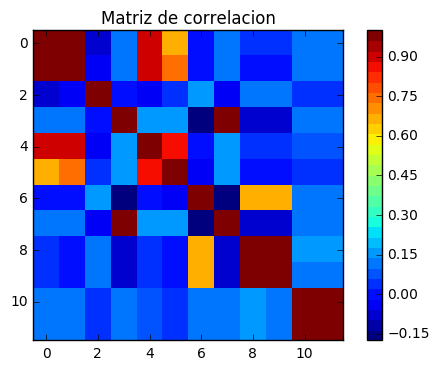

In [57]:
correlation_matrix(pd.DataFrame(tabla_zeros_2))

## Iteramos el Splitter v2

In [109]:
R2_global = []
R2_Original_GridSearchCV = 0
R2_Imputado_GridSearchCV = 0

for i in range(0,np.shape(tabla_zeros_2)[1]):
    ## Tabla_zeros
    X_train, X_test, y_train, y_test = splitter_v2(np.array(tabla_zeros_2),i)
    best_max_depth = Grid_Search_CV(X_train, y_train)
    R2_Original_GridSearchCV = DTR_v2(X_train, X_test, y_train, y_test,best_max_depth)

    ## Tabla_imputada
    X_train, X_test, y_train, y_test = splitter_v2(np.array(tabla_imputada),i)
    best_max_depth = Grid_Search_CV(X_train, y_train)
    R2_Imputado_GridSearchCV = DTR_v2(X_train, X_test, y_train, y_test,best_max_depth)
    
    # Recopilamos los R2
    R2_global.append(np.array([R2_Original_GridSearchCV,R2_Imputado_GridSearchCV]))

pd.DataFrame(R2_global,columns=['Original','Imputado'])

TypeError: 'DecisionTreeRegressor' object is not iterable

In [149]:
R2_global = []

for i in range(0,np.shape(tabla_zeros_2)[1]):
    ## Tabla_zeros
    X_train, X_test, y_train, y_test = splitter_v2(np.array(tabla_zeros_2),i)
    optimunGrid = Grid_Search_CV_v8(X_train, y_train)
    y_predict_optimunGrid = optimunGrid.predict(X_test)
    R2_Original_GridSearchCV = r2(y_test, y_predict_optimunGrid)
    
    
    ## Tabla_imputada
    X_train, X_test, y_train, y_test = splitter_v2(np.array(tabla_imputada),i)
    optimunGrid = Grid_Search_CV_v8(X_train, y_train)
    y_predict_optimunGrid = optimunGrid.predict(X_test)
    R2_Imputado_GridSearchCV = r2(y_test, y_predict_optimunGrid)
    
    
    # Recopilamos los R2
    R2_global.append(np.array([R2_Original_GridSearchCV,R2_Imputado_GridSearchCV]))

pd.DataFrame(R2_global,columns=['Original','Imputado'])

Original  Imputado
0   0.998628  0.999845
1  -0.031222  0.138091
2   0.969648  0.441602
3   0.092653  0.109133
4   0.852019  0.904002
5   0.998123  0.991937
6   0.916766  0.664626
7   0.172613  0.285846
8   0.944787  0.847092
9   0.569177  0.416630
10  0.942990  0.993081
11  0.935797  0.984421

In [150]:
R2_global = []

for i in range(0,np.shape(tabla_zeros_2)[1]):
    ## Tabla_zeros
    X_train, X_test, y_train, y_test = splitter_v2(np.array(tabla_zeros_2),i)
    optimunGrid = Grid_Search_CV_v9(X_train, y_train)
    y_predict_optimunGrid = optimunGrid.predict(X_test)
    R2_Original_GridSearchCV = r2(y_test, y_predict_optimunGrid)
    
    
    ## Tabla_imputada
    X_train, X_test, y_train, y_test = splitter_v2(np.array(tabla_imputada),i)
    optimunGrid = Grid_Search_CV_v9(X_train, y_train)
    y_predict_optimunGrid = optimunGrid.predict(X_test)
    R2_Imputado_GridSearchCV = r2(y_test, y_predict_optimunGrid)
    
    
    # Recopilamos los R2
    R2_global.append(np.array([R2_Original_GridSearchCV,R2_Imputado_GridSearchCV]))

pd.DataFrame(R2_global,columns=['Original','Imputado'])

Original  Imputado
0   0.999558  0.994564
1  -0.063485  0.978667
2   0.987299  0.969704
3   0.211759 -0.021372
4   0.395172 -0.104259
5   0.978645  0.979647
6   0.736828  0.050761
7   0.039587  0.032422
8   0.913484  0.466425
9   0.947342  0.456011
10  0.925793  0.663925
11  0.118221  0.957753

## Pruebas de Grid

In [153]:
R2_global = []

for i in range(0,np.shape(tabla_zeros_2)[1]):
    ## Tabla_zeros
    X_train, X_test, y_train, y_test = splitter_v2(np.array(tabla_zeros_2),i)
    optimunGrid = Grid_Search_CV_v5(X_train, y_train)
    y_predict_optimunGrid = optimunGrid.predict(X_test)
    R2_Original_GridSearchCV = r2(y_test, y_predict_optimunGrid)
    
    
    ## Tabla_imputada
    X_train, X_test, y_train, y_test = splitter_v2(np.array(tabla_imputada),i)
    optimunGrid = Grid_Search_CV_v5(X_train, y_train)
    y_predict_optimunGrid = optimunGrid.predict(X_test)
    R2_Imputado_GridSearchCV = r2(y_test, y_predict_optimunGrid)
    
    
    # Recopilamos los R2
    R2_global.append(np.array([R2_Original_GridSearchCV,R2_Imputado_GridSearchCV]))

pd.DataFrame(R2_global,columns=['Original','Imputado'])

Original  Imputado
0   0.996150  0.999706
1  -0.250704  0.988820
2   0.926993  0.753580
3  -0.288338 -0.006901
4   0.852886 -0.231879
5   0.986623  0.967738
6   0.433195  0.259307
7  -0.018056 -0.020247
8   0.844421  0.556610
9   0.870087  0.691416
10  0.995189  0.929144
11  0.889629  0.996454

In [154]:
R2_global = []

for i in range(0,np.shape(tabla_zeros_2)[1]):
    ## Tabla_zeros
    X_train, X_test, y_train, y_test = splitter_v2(np.array(tabla_zeros_2),i)
    optimunGrid = Grid_Search_CV_v6(X_train, y_train)
    y_predict_optimunGrid = optimunGrid.predict(X_test)
    R2_Original_GridSearchCV = r2(y_test, y_predict_optimunGrid)
    
    
    ## Tabla_imputada
    X_train, X_test, y_train, y_test = splitter_v2(np.array(tabla_imputada),i)
    optimunGrid = Grid_Search_CV_v6(X_train, y_train)
    y_predict_optimunGrid = optimunGrid.predict(X_test)
    R2_Imputado_GridSearchCV = r2(y_test, y_predict_optimunGrid)
    
    
    # Recopilamos los R2
    R2_global.append(np.array([R2_Original_GridSearchCV,R2_Imputado_GridSearchCV]))

pd.DataFrame(R2_global,columns=['Original','Imputado'])

Original  Imputado
0    0.999721  0.997365
1  -37.483831 -0.001776
2    0.865643  0.953407
3    0.203291  0.203881
4   -0.101487  0.909935
5   -0.172133  0.990901
6    0.515550  0.398772
7    0.111774 -0.277697
8    0.815693  0.681839
9    0.916239  0.582202
10   0.992495  0.348441
11   0.987413 -5.749084

In [168]:
R2_global = []

for i in range(0,np.shape(tabla_zeros_2)[1]):
    ## Tabla_zeros
    X_train, X_test, y_train, y_test = splitter_v2(np.array(tabla_zeros_2),i)
    optimunGrid = Grid_Search_CV_v8(X_train, y_train)
    y_predict_optimunGrid = optimunGrid.predict(X_test)
    R2_Original_GridSearchCV = r2(y_test, y_predict_optimunGrid)
    
    
    ## Tabla_imputada
    X_train, X_test, y_train, y_test = splitter_v2(np.array(tabla_imputada),i)
    optimunGrid = Grid_Search_CV_v8(X_train, y_train)
    y_predict_optimunGrid = optimunGrid.predict(X_test)
    R2_Imputado_GridSearchCV = r2(y_test, y_predict_optimunGrid)
    
    
    # Recopilamos los R2
    R2_global.append(np.array([R2_Original_GridSearchCV,R2_Imputado_GridSearchCV]))

pd.DataFrame(R2_global,columns=['Original','Imputado'])

Original  Imputado
0    0.992570  0.862766
1  -30.502836  0.017588
2    0.815290  0.863773
3   -0.016685  0.221931
4    0.860025  0.526907
5    0.999139  0.990266
6    0.147187  0.361772
7    0.263552  0.254727
8    0.817789  0.607125
9    0.855421  0.583976
10   0.457430  0.998594
11   0.278464  0.976650

In [173]:
R2_global = []

for i in range(0,np.shape(tabla_zeros_2)[1]):
    ## Tabla_zeros
    X_train, X_test, y_train, y_test = splitter_v2(np.array(tabla_zeros_2),i)
    optimunGrid = Grid_Search_CV_v8(X_train, y_train)
    y_predict_optimunGrid = optimunGrid.predict(X_test)
    R2_Original_GridSearchCV = r2(y_test, y_predict_optimunGrid)
    
    
    ## Tabla_imputada
    X_train, X_test, y_train, y_test = splitter_v2(np.array(tabla_imputada),i)
    optimunGrid = Grid_Search_CV_v8(X_train, y_train)
    y_predict_optimunGrid = optimunGrid.predict(X_test)
    R2_Imputado_GridSearchCV = r2(y_test, y_predict_optimunGrid)
    
    
    # Recopilamos los R2
    R2_global.append(np.array([R2_Original_GridSearchCV,R2_Imputado_GridSearchCV]))

pd.DataFrame(R2_global,columns=['Original','Imputado'])

Original  Imputado
0   0.991743  0.997992
1   0.974769  0.984735
2   0.871492  0.954836
3   0.075202  0.112193
4   0.996893  0.161712
5   0.997660  0.975922
6   0.135489 -0.140142
7   0.172526  0.013746
8   0.912354  0.600794
9   0.961667  0.854447
10  0.997101  0.562855
11  0.472045  0.872995

In [174]:
R2_global = []

for i in range(0,np.shape(tabla_zeros_2)[1]):
    ## Tabla_zeros
    X_train, X_test, y_train, y_test = splitter_v2(np.array(tabla_zeros_2),i)
    optimunGrid = Grid_Search_CV_v8(X_train, y_train)
    y_predict_optimunGrid = optimunGrid.predict(X_test)
    R2_Original_GridSearchCV = r2(y_test, y_predict_optimunGrid)
    
    
    ## Tabla_imputada
    X_train, X_test, y_train, y_test = splitter_v2(np.array(tabla_imputada),i)
    optimunGrid = Grid_Search_CV_v8(X_train, y_train)
    y_predict_optimunGrid = optimunGrid.predict(X_test)
    R2_Imputado_GridSearchCV = r2(y_test, y_predict_optimunGrid)
    
    
    # Recopilamos los R2
    R2_global.append(np.array([R2_Original_GridSearchCV,R2_Imputado_GridSearchCV]))

pd.DataFrame(R2_global,columns=['Original','Imputado'])

Original  Imputado
0   0.946114  0.815429
1   0.993307 -0.726368
2   0.928082  0.602653
3   0.190193  0.226195
4   0.325824 -0.261314
5   0.997006  0.988424
6   0.803440 -1.553347
7   0.380184  0.096789
8   0.899406  0.584736
9   0.875918  0.501260
10 -0.656288  0.370727
11  0.832651  0.978624

In [175]:
R2_global = []

for i in range(0,np.shape(tabla_zeros_2)[1]):
    ## Tabla_zeros
    X_train, X_test, y_train, y_test = splitter_v2(np.array(tabla_zeros_2),i)
    optimunGrid = Grid_Search_CV_v8(X_train, y_train)
    y_predict_optimunGrid = optimunGrid.predict(X_test)
    R2_Original_GridSearchCV = r2(y_test, y_predict_optimunGrid)
    
    
    ## Tabla_imputada
    X_train, X_test, y_train, y_test = splitter_v2(np.array(tabla_imputada),i)
    optimunGrid = Grid_Search_CV_v8(X_train, y_train)
    y_predict_optimunGrid = optimunGrid.predict(X_test)
    R2_Imputado_GridSearchCV = r2(y_test, y_predict_optimunGrid)
    
    
    # Recopilamos los R2
    R2_global.append(np.array([R2_Original_GridSearchCV,R2_Imputado_GridSearchCV]))

pd.DataFrame(R2_global,columns=['Original','Imputado'])

Original  Imputado
0    0.999407  0.954898
1  -17.597705  0.969117
2    0.793095  0.090504
3   -0.010323 -0.095804
4   -0.260692  0.612694
5    0.946005  0.992279
6    0.914659  0.683315
7    0.202307  0.244098
8    0.818521  0.975369
9    0.153400  0.763199
10   0.979799  0.970782
11   0.521565  0.994202

In [176]:
R2_global = []

for i in range(0,np.shape(tabla_zeros_2)[1]):
    ## Tabla_zeros
    X_train, X_test, y_train, y_test = splitter_v2(np.array(tabla_zeros_2),i)
    optimunGrid = Grid_Search_CV_v8(X_train, y_train)
    y_predict_optimunGrid = optimunGrid.predict(X_test)
    R2_Original_GridSearchCV = r2(y_test, y_predict_optimunGrid)
    
    
    ## Tabla_imputada
    X_train, X_test, y_train, y_test = splitter_v2(np.array(tabla_imputada),i)
    optimunGrid = Grid_Search_CV_v8(X_train, y_train)
    y_predict_optimunGrid = optimunGrid.predict(X_test)
    R2_Imputado_GridSearchCV = r2(y_test, y_predict_optimunGrid)
    
    
    # Recopilamos los R2
    R2_global.append(np.array([R2_Original_GridSearchCV,R2_Imputado_GridSearchCV]))

pd.DataFrame(R2_global,columns=['Original','Imputado'])

Original  Imputado
0   0.999707  0.998458
1  -0.107299 -0.005429
2   0.834672  0.938148
3  -0.054468  0.151647
4   0.094388 -0.458216
5   0.987562  0.986079
6   0.857647  0.468106
7  -0.301387  0.244346
8   0.849957  0.542721
9   0.901198  0.621449
10  0.962655  0.997284
11  0.925425 -0.246272

In [177]:
R2_global = []

for i in range(0,np.shape(tabla_zeros_2)[1]):
    ## Tabla_zeros
    X_train, X_test, y_train, y_test = splitter_v2(np.array(tabla_zeros_2),i)
    optimunGrid = Grid_Search_CV_v8(X_train, y_train)
    y_predict_optimunGrid = optimunGrid.predict(X_test)
    R2_Original_GridSearchCV = r2(y_test, y_predict_optimunGrid)
    
    
    ## Tabla_imputada
    X_train, X_test, y_train, y_test = splitter_v2(np.array(tabla_imputada),i)
    optimunGrid = Grid_Search_CV_v8(X_train, y_train)
    y_predict_optimunGrid = optimunGrid.predict(X_test)
    R2_Imputado_GridSearchCV = r2(y_test, y_predict_optimunGrid)
    
    
    # Recopilamos los R2
    R2_global.append(np.array([R2_Original_GridSearchCV,R2_Imputado_GridSearchCV]))

pd.DataFrame(R2_global,columns=['Original','Imputado'])

Original  Imputado
0   0.999706  0.998380
1   0.987099  0.955823
2   0.934935  0.974691
3   0.309481 -0.261273
4   0.082857  0.895803
5   0.949078  0.984394
6   0.719417  0.889217
7   0.240792  0.215910
8   0.833639  0.228587
9   0.472211  0.649524
10  0.994180  0.998226
11  0.977021 -2.698455

In [178]:
R2_global = []

for i in range(0,np.shape(tabla_zeros_2)[1]):
    ## Tabla_zeros
    X_train, X_test, y_train, y_test = splitter_v2(np.array(tabla_zeros_2),i)
    optimunGrid = Grid_Search_CV_v8(X_train, y_train)
    y_predict_optimunGrid = optimunGrid.predict(X_test)
    R2_Original_GridSearchCV = r2(y_test, y_predict_optimunGrid)
    
    
    ## Tabla_imputada
    X_train, X_test, y_train, y_test = splitter_v2(np.array(tabla_imputada),i)
    optimunGrid = Grid_Search_CV_v8(X_train, y_train)
    y_predict_optimunGrid = optimunGrid.predict(X_test)
    R2_Imputado_GridSearchCV = r2(y_test, y_predict_optimunGrid)
    
    
    # Recopilamos los R2
    R2_global.append(np.array([R2_Original_GridSearchCV,R2_Imputado_GridSearchCV]))

pd.DataFrame(R2_global,columns=['Original','Imputado'])

Original   Imputado
0   0.988987   0.999505
1   0.940202 -28.190735
2   0.989660   0.943304
3   0.285161   0.124615
4   0.992798  -1.332422
5   0.994190   0.961373
6   0.919128   0.550327
7   0.251964   0.173829
8   0.948256   0.749244
9   0.953102   0.391221
10  0.996400   0.851629
11  0.960617   0.992358

In [179]:
R2_global = []

for i in range(0,np.shape(tabla_zeros_2)[1]):
    ## Tabla_zeros
    X_train, X_test, y_train, y_test = splitter_v2(np.array(tabla_zeros_2),i)
    optimunGrid = Grid_Search_CV_v8(X_train, y_train)
    y_predict_optimunGrid = optimunGrid.predict(X_test)
    R2_Original_GridSearchCV = r2(y_test, y_predict_optimunGrid)
    
    
    ## Tabla_imputada
    X_train, X_test, y_train, y_test = splitter_v2(np.array(tabla_imputada),i)
    optimunGrid = Grid_Search_CV_v8(X_train, y_train)
    y_predict_optimunGrid = optimunGrid.predict(X_test)
    R2_Imputado_GridSearchCV = r2(y_test, y_predict_optimunGrid)
    
    
    # Recopilamos los R2
    R2_global.append(np.array([R2_Original_GridSearchCV,R2_Imputado_GridSearchCV]))

pd.DataFrame(R2_global,columns=['Original','Imputado'])

Original  Imputado
0   0.953443 -8.054799
1  -0.101586 -0.662078
2   0.837753  0.732258
3  -0.061746  0.254950
4  -0.139759  0.992379
5   0.962321  0.887790
6   0.095891  0.660611
7   0.144485  0.019195
8   0.850898  0.926404
9   0.894178  0.216260
10  0.991650  0.992840
11  0.754953  0.979424

In [86]:
def normalizar_datos(tab):
    sc = StandardScaler()
    X_norm = sc.fit_transform(tab)
    return X_norm

In [87]:
tabla_imputada_normalizada = normalizar_datos(tabla_imputada)

In [84]:
R2_global = []

for i in range(0,np.shape(tabla_zeros_2)[1]):
    ## Tabla_zeros
    X_train, X_test, y_train, y_test = splitter_v2(np.array(tabla_zeros_2),i)
    grid , best_depth, optimunGrid = Grid_Search_CV(X_train, y_train)
    y_predict_optimunGrid = optimunGrid.predict(X_test)
    R2_Original_GridSearchCV = r2(y_test, y_predict_optimunGrid)
        
    # Recopilamos los R2
    R2_global.append(R2_Original_GridSearchCV)

pd.DataFrame(R2_global,columns=['Original'])

Original
0     0.997558
1  -578.547179
2     0.930690
3     0.226413
4     0.792398
5     0.994491
6     0.799615
7    -0.211662
8     0.905515
9     0.974946
10    0.889413
11    0.991990

In [119]:
R2_global = []

for i in range(0,np.shape(tabla_zeros_2)[1]):
    ## Tabla_zeros
    X_train, X_test, y_train, y_test = splitter_v2(np.array(tabla_zeros_2),i)
    optimunGrid = Grid_Search_CV_v4(X_train, y_train)
    y_predict_optimunGrid = optimunGrid.predict(X_test)
    R2_Original_GridSearchCV = r2_score(y_test, y_predict_optimunGrid)
        
    # Recopilamos los R2
    R2_global.append(R2_Original_GridSearchCV)

pd.DataFrame(R2_global,columns=['Original'])

Original
0    0.996998
1  -19.195189
2    0.965004
3    0.094620
4    0.523862
5    0.960305
6    0.593616
7    0.109098
8    0.948263
9    0.991383
10 -13.091188
11   0.912937

In [124]:
R2_global = []

for i in range(0,np.shape(tabla_zeros_2)[1]):
    ## Tabla_zeros
    X_train, X_test, y_train, y_test = splitter_v2(np.array(tabla_imputada),i)
    optimunGrid = Grid_Search_CV_v4(X_train, y_train)
    y_predict_optimunGrid = optimunGrid.predict(X_test)
    R2_Original_GridSearchCV = r2_score(y_test, y_predict_optimunGrid)
        
    # Recopilamos los R2
    R2_global.append(R2_Original_GridSearchCV)

pd.DataFrame(R2_global,columns=['Original'])

Original
0   0.992359
1   0.927364
2   0.809521
3   0.221154
4  -1.009824
5   0.993574
6  -0.040973
7   0.274399
8   0.679868
9   0.911151
10  0.993551
11  0.982863

In [107]:
R2_global = []

for i in range(0,np.shape(tabla_zeros_2)[1]):
    ## Tabla_zeros
    X_train, X_test, y_train, y_test = splitter_v2(np.array(tabla_imputada),i)
    optimunGrid = Grid_Search_CV(X_train, y_train)
    y_predict_optimunGrid = optimunGrid.predict(X_test)
    R2_Original_GridSearchCV = r2(y_test, y_predict_optimunGrid)
        
    # Recopilamos los R2
    R2_global.append(R2_Original_GridSearchCV)

pd.DataFrame(R2_global,columns=['Original'])

Original
0    0.997340
1  -18.638140
2    0.917981
3    0.147327
4    0.994884
5    0.964187
6    0.475654
7    0.171841
8    0.368164
9    0.431970
10   0.025465
11   0.980805

In [72]:
R2_global = []
R2_Original_GridSearchCV = 0
R2_Imputado_GridSearchCV = 0


for i in range(0,np.shape(tabla_zeros_2)[1]):
    ## Tabla_zeros
    X_train, X_test, y_train, y_test = splitter_v2(np.array(tabla_zeros_2),i)
    grid , best_depth, optimunGrid = Grid_Search_CV(X_train, y_train)
    y_predict_optimunGrid = optimunGrid.predict(X_test)
    R2_Original_GridSearchCV = r2(y_test, y_predict_optimunGrid)

    ## Tabla_imputada
    X_train, X_test, y_train, y_test = splitter_v2(np.array(tabla_imputada),i)
    grid , best_depth, optimunGrid = Grid_Search_CV(X_train, y_train)
    y_predict_optimunGrid = optimunGrid.predict(X_test)
    R2_Imputado_GridSearchCV = r2(y_test, y_predict_optimunGrid)
    
    # Recopilamos los R2
    R2_global.append(np.array([R2_Original_GridSearchCV,R2_Imputado_GridSearchCV]))

pd.DataFrame(R2_global,columns=['Original','Imputado'])

Original  Imputado
0   0.999712  0.996311
1   0.185945  0.571996
2   0.796386  0.983405
3   0.219496  0.228161
4   0.290951  0.955041
5   0.991838  0.194901
6   0.807165  0.761086
7  -0.070661  0.221044
8   0.806086  0.954960
9   0.425252  0.730291
10  0.772574  0.998124
11  0.867733  0.979043

In [75]:
R2_global = []
R2_Original_GridSearchCV = 0
R2_Imputado_GridSearchCV = 0


for i in range(0,np.shape(tabla_zeros_2)[1]):
    ## Tabla_zeros
    X_train, X_test, y_train, y_test = splitter_v2(np.array(tabla_zeros_2),i)
    grid , best_depth, optimunGrid = Grid_Search_CV(X_train, y_train)
    y_predict_optimunGrid = optimunGrid.predict(X_test)
    R2_Original_GridSearchCV = r2(y_test, y_predict_optimunGrid)

    ## Tabla_imputada
    X_train, X_test, y_train, y_test = splitter_v2(np.array(tabla_imputada),i)
    grid , best_depth, optimunGrid = Grid_Search_CV(X_train, y_train)
    y_predict_optimunGrid = optimunGrid.predict(X_test)
    R2_Imputado_GridSearchCV = r2(y_test, y_predict_optimunGrid)
    
    # Recopilamos los R2
    R2_global.append(np.array([R2_Original_GridSearchCV,R2_Imputado_GridSearchCV]))

pd.DataFrame(R2_global,columns=['Original','Imputado'])

Original   Imputado
0   0.996779   0.999709
1   0.975175 -33.144331
2   0.895118   0.838364
3   0.294571   0.218840
4   0.125492   0.657503
5   0.992965   0.990236
6   0.560762   0.348565
7  -0.038390   0.143274
8   0.540579   0.524140
9   0.978793   0.556276
10  0.181722   0.519332
11  0.996318 -10.436739

In [74]:
R2_global = []
R2_Original_GridSearchCV = 0
R2_Imputado_GridSearchCV = 0


for i in range(0,np.shape(tabla_zeros_2)[1]):
    ## Tabla_zeros
    X_train, X_test, y_train, y_test = splitter_v2(np.array(tabla_zeros_2),i)
    grid , best_depth, optimunGrid = Grid_Search_CV_v8(X_train, y_train)
    y_predict_optimunGrid = optimunGrid.predict(X_test)
    R2_Original_GridSearchCV = r2(y_test, y_predict_optimunGrid)

    ## Tabla_imputada
    X_train, X_test, y_train, y_test = splitter_v2(np.array(tabla_imputada),i)
    grid , best_depth, optimunGrid = Grid_Search_CV(X_train, y_train)
    y_predict_optimunGrid = optimunGrid.predict(X_test)
    R2_Imputado_GridSearchCV = r2(y_test, y_predict_optimunGrid)
    
    # Recopilamos los R2
    R2_global.append(np.array([R2_Original_GridSearchCV,R2_Imputado_GridSearchCV]))

pd.DataFrame(R2_global,columns=['Original','Imputado'])

Original  Imputado
0   0.998432  0.998303
1   0.914601 -3.751138
2   0.993063  0.881402
3   0.011472  0.228755
4   0.978127  0.561420
5   0.998260  0.996663
6   0.661116  0.769380
7   0.162332 -0.009124
8   0.651764  0.893119
9   0.562136  0.536808
10  0.996702  0.817189
11  0.385938  0.990332

## Iteramos individualmente el nuevo Splitter v2

In [112]:
def iter_R2(tab,iteraciones):
    
    temporal = []
    iter_R2_Global_GridSearchCV = []
    
    for k in range(np.shape(tab)[1]):
        for i in range(iteraciones):
            ## Valores Originales
            X_train, X_test, y_train, y_test = splitter_v2(np.array(tab),i)
            optimunGrid = Grid_Search_CV_v3(X_train, y_train)
            y_predict_optimunGrid = optimunGrid.predict(X_test)
            R2_Original_GridSearchCV = r2(y_test, y_predict_optimunGrid)          
            temporal.append(R2_Original_GridSearchCV)
        iter_R2_Global_GridSearchCV.append(temporal)
        temporal = []
        
    return iter_R2_Global_GridSearchCV

In [125]:
def iter_R2_v3(tab,iteraciones):
    temporal = []
    iter_R2_Global_GridSearchCV = []

    for k in range(np.shape(tab)[1]):
        for i in range(iteraciones):
            ## Valores Originales
            X_train, X_test, y_train, y_test = splitter_v2(np.array(tab),i)
            optimunGrid = Grid_Search_CV_v4(X_train, y_train)
            y_predict_optimunGrid = optimunGrid.predict(X_test)
            R2_Original_GridSearchCV = r2_score(y_test, y_predict_optimunGrid)         
            temporal.append(R2_Original_GridSearchCV)
        iter_R2_Global_GridSearchCV.append(temporal)
        temporal = []
    return iter_R2_Global_GridSearchCV

In [129]:
def iter_R2_v5(tab,iteraciones):
    temporal = []
    iter_R2_Global_GridSearchCV = []

    for k in range(np.shape(tab)[1]):
        for i in range(iteraciones):
            ## Valores Originales
            X_train, X_test, y_train, y_test = splitter_v2(np.array(tab),i)
            optimunGrid = Grid_Search_CV_v5(X_train, y_train)
            y_predict_optimunGrid = optimunGrid.predict(X_test)
            R2_Original_GridSearchCV = r2_score(y_test, y_predict_optimunGrid)         
            temporal.append(R2_Original_GridSearchCV)
        iter_R2_Global_GridSearchCV.append(temporal)
        temporal = []
    return iter_R2_Global_GridSearchCV

In [134]:
def iter_R2_v6(tab,iteraciones):
    temporal = []
    iter_R2_Global_GridSearchCV = []

    for k in range(np.shape(tab)[1]):
        for i in range(iteraciones):
            ## Valores Originales
            X_train, X_test, y_train, y_test = splitter_v2(np.array(tab),i)
            optimunGrid = Grid_Search_CV_v6(X_train, y_train)
            y_predict_optimunGrid = optimunGrid.predict(X_test)
            R2_Original_GridSearchCV = r2_score(y_test, y_predict_optimunGrid)         
            temporal.append(R2_Original_GridSearchCV)
        iter_R2_Global_GridSearchCV.append(temporal)
        temporal = []
    return iter_R2_Global_GridSearchCV

In [165]:
def iter_R2_v7(tab,iteraciones):
    temporal = []
    iter_R2_Global_GridSearchCV = []

    for k in range(np.shape(tab)[1]):
        for i in range(iteraciones):
            ## Valores Originales
            X_train, X_test, y_train, y_test = splitter_v2(np.array(tab),i)
            optimunGrid = Grid_Search_CV_v7(X_train, y_train)
            y_predict_optimunGrid = optimunGrid.predict(X_test)
            R2_Original_GridSearchCV = r2_score(y_test, y_predict_optimunGrid)         
            temporal.append(R2_Original_GridSearchCV)
        iter_R2_Global_GridSearchCV.append(temporal)
        temporal = []
    return iter_R2_Global_GridSearchCV

In [142]:
def iter_R2_v8(tab,iteraciones):
    temporal = []
    iter_R2_Global_GridSearchCV = []

    for k in range(np.shape(tab)[1]):
        for i in range(iteraciones):
            ## Valores Originales
            X_train, X_test, y_train, y_test = splitter_v2(np.array(tab),i)
            optimunGrid = Grid_Search_CV_v8(X_train, y_train)
            y_predict_optimunGrid = optimunGrid.predict(X_test)
            R2_Original_GridSearchCV = r2_score(y_test, y_predict_optimunGrid)         
            temporal.append(R2_Original_GridSearchCV)
        iter_R2_Global_GridSearchCV.append(temporal)
        temporal = []
    return iter_R2_Global_GridSearchCV

In [143]:
def iter_R2_v9(tab,iteraciones):
    temporal = []
    iter_R2_Global_GridSearchCV = []

    for k in range(np.shape(tab)[1]):
        for i in range(iteraciones):
            ## Valores Originales
            X_train, X_test, y_train, y_test = splitter_v2(np.array(tab),i)
            optimunGrid = Grid_Search_CV_v9(X_train, y_train)
            y_predict_optimunGrid = optimunGrid.predict(X_test)
            R2_Original_GridSearchCV = r2_score(y_test, y_predict_optimunGrid)         
            temporal.append(R2_Original_GridSearchCV)
        iter_R2_Global_GridSearchCV.append(temporal)
        temporal = []
    return iter_R2_Global_GridSearchCV

#### Media de las Iteraciones R2 para cada indicador en cada caso

In [100]:
def iter_mean(iter_score):
    temporal = []
    temporal = np.array(iter_score)
    mean_score = []

    for k in range(np.shape(tabla_zeros_2)[1]):
        mean_score.append(np.mean(temporal[k,:]))
        
    return mean_score

## AQUI VOY

In [180]:
start_time = time.time()

df = pd.DataFrame(np.column_stack((iter_mean(iter_R2_v9(np.array(tabla_zeros_2),7)),iter_mean(iter_R2_v9(np.array(tabla_imputada),7)))),columns=['Original','Imputando'])

print("--- %s seconds ---" % (time.time() - start_time))
df

--- 136.345000029 seconds ---


Original  Imputando
0   0.563188   0.331912
1   0.110150   0.263498
2   0.461659   0.818013
3   0.512947  -0.342433
4   0.740864   0.435047
5   0.668032   0.461759
6   0.544065   0.684570
7   0.549957   0.530798
8  -0.348821   0.343203
9   0.092713  -6.751776
10  0.629676   0.455218
11  0.622180   0.461536

In [127]:
start_time = time.time()

df = pd.DataFrame(np.column_stack((iter_mean(iter_R2_v3(np.array(tabla_zeros_2),7)),iter_mean(iter_R2_v3(np.array(tabla_imputada),7)))),columns=['Original','Imputando'])

print("--- %s seconds ---" % (time.time() - start_time))
df

--- 125.930999994 seconds ---


Original  Imputando
0   0.766599   0.568631
1   0.748415   0.812608
2   0.735314   0.608860
3   0.558067   0.699336
4  -5.530111   0.546428
5   0.567859   0.508927
6   0.648950   0.764656
7   0.772592   0.618735
8   0.700614   0.648416
9  -5.025284   0.424611
10  0.118540   0.339073
11  0.710728   0.617232

In [130]:
start_time = time.time()

df = pd.DataFrame(np.column_stack((iter_mean(iter_R2_v5(np.array(tabla_zeros_2),7)),iter_mean(iter_R2_v5(np.array(tabla_imputada),7)))),columns=['Original','Imputando'])

print("--- %s seconds ---" % (time.time() - start_time))
df

--- 117.520999908 seconds ---


Original  Imputando
0   0.525275   0.338450
1   0.646321   0.749877
2   0.777482   0.692306
3   0.808469   0.659610
4   0.525613   0.369081
5   0.743752   0.403472
6   0.501405   0.525641
7   0.783468   0.685627
8   0.064846   0.517121
9   0.694684   0.083366
10 -0.016074   0.670419
11  0.497231   0.514609

In [131]:
start_time = time.time()

df = pd.DataFrame(np.column_stack((iter_mean(iter_R2_v5(np.array(tabla_zeros_2),7)),iter_mean(iter_R2_v5(np.array(tabla_imputada),7)))),columns=['Original','Imputando'])

print("--- %s seconds ---" % (time.time() - start_time))
df

--- 118.838999987 seconds ---


Original  Imputando
0   0.255049   0.351779
1   0.694418   0.750367
2   0.643677   0.095462
3   0.612352   0.709422
4   0.608342   0.648575
5   0.315870   0.591969
6   0.577672   0.465126
7   0.624706   0.668885
8   0.779741   0.472032
9   0.550780   0.658494
10  0.044005   0.699369
11  0.717774   0.653810

In [136]:
start_time = time.time()

df = pd.DataFrame(np.column_stack((iter_mean(iter_R2_v6(np.array(tabla_zeros_2),7)),iter_mean(iter_R2_v6(np.array(tabla_imputada),7)))),columns=['Original','Imputando'])

print("--- %s seconds ---" % (time.time() - start_time))
df

--- 118.86500001 seconds ---


Original  Imputando
0    0.311469   0.613075
1    0.643331   0.405483
2    0.589183  -0.464020
3    0.492055  -0.469350
4    0.571747   0.332168
5    0.419728   0.397272
6   -1.171127   0.730870
7    0.378834  -4.515405
8    0.383592   0.493278
9    0.520109   0.777886
10 -21.780854   0.703505
11   0.649622   0.797233

In [137]:
start_time = time.time()

df = pd.DataFrame(np.column_stack((iter_mean(iter_R2_v6(np.array(tabla_zeros_2),7)),iter_mean(iter_R2_v6(np.array(tabla_imputada),7)))),columns=['Original','Imputando'])

print("--- %s seconds ---" % (time.time() - start_time))
df

--- 126.265000105 seconds ---


Original  Imputando
0   0.478102   0.488147
1   0.599850   0.277800
2   0.293740   0.269184
3   0.654496   0.706277
4  -0.994007   0.661704
5   0.694367   0.547617
6   0.595799   0.373019
7  -2.710179  -0.632355
8   0.617101   0.697825
9   0.606699   0.547468
10 -0.233792   0.603034
11  0.650021   0.669386

In [138]:
start_time = time.time()

df = pd.DataFrame(np.column_stack((iter_mean(iter_R2_v7(np.array(tabla_zeros_2),7)),iter_mean(iter_R2_v7(np.array(tabla_imputada),7)))),columns=['Original','Imputando'])

print("--- %s seconds ---" % (time.time() - start_time))
df

--- 137.404999971 seconds ---


Original  Imputando
0   0.524547   0.639130
1  -2.381281   0.624476
2   0.659665   0.650223
3   0.541477   0.722676
4   0.399948   0.567012
5   0.867774   0.678180
6   0.471946   0.703427
7   0.605047   0.517743
8   0.760753  -7.499847
9   0.779834   0.712592
10 -3.028840   0.554312
11 -5.423566   0.416100

In [139]:
start_time = time.time()

df = pd.DataFrame(np.column_stack((iter_mean(iter_R2_v7(np.array(tabla_zeros_2),7)),iter_mean(iter_R2_v7(np.array(tabla_imputada),7)))),columns=['Original','Imputando'])

print("--- %s seconds ---" % (time.time() - start_time))
df

--- 128.958999872 seconds ---


Original  Imputando
0    0.372458   0.523951
1    0.671425   0.096521
2    0.643873   0.467916
3    0.477623   0.559519
4  -34.845413   0.341304
5    0.743509   0.350911
6    0.878855  -4.468860
7    0.531259 -40.509841
8    0.676646   0.797776
9    0.100094   0.591494
10   0.679870   0.571509
11   0.652419   0.393473

In [144]:
start_time = time.time()

df = pd.DataFrame(np.column_stack((iter_mean(iter_R2_v8(np.array(tabla_zeros_2),7)),iter_mean(iter_R2_v8(np.array(tabla_imputada),7)))),columns=['Original','Imputando'])

print("--- %s seconds ---" % (time.time() - start_time))
df

--- 134.713000059 seconds ---


Original  Imputando
0   0.700863   0.798330
1   0.353510  -0.186341
2   0.838088   0.610352
3   0.628033  -0.516923
4   0.480934   0.070337
5   0.754019   0.668169
6   0.724907   0.517648
7   0.605937   0.488869
8   0.722524  -0.438620
9   0.732509   0.300623
10  0.583243   0.570588
11  0.601893  -2.241759

In [145]:
start_time = time.time()

df = pd.DataFrame(np.column_stack((iter_mean(iter_R2_v8(np.array(tabla_zeros_2),7)),iter_mean(iter_R2_v8(np.array(tabla_imputada),7)))),columns=['Original','Imputando'])

print("--- %s seconds ---" % (time.time() - start_time))
df

--- 124.467999935 seconds ---


Original  Imputando
0   0.729687   0.784047
1   0.754365   0.557059
2   0.702191  -3.143290
3   0.395643   0.523055
4  -5.394305   0.489918
5   0.725483   0.510234
6   0.743771   0.690238
7   0.891115   0.306496
8   0.538627   0.347506
9  -6.501869   0.590165
10  0.775939  -0.502800
11 -2.853964   0.298222

In [146]:
start_time = time.time()

df = pd.DataFrame(np.column_stack((iter_mean(iter_R2_v9(np.array(tabla_zeros_2),7)),iter_mean(iter_R2_v9(np.array(tabla_imputada),7)))),columns=['Original','Imputando'])

print("--- %s seconds ---" % (time.time() - start_time))
df

--- 121.491000175 seconds ---


Original  Imputando
0   0.481482   0.521495
1   0.703084   0.261028
2   0.685596   0.518125
3   0.825626   0.732404
4   0.743995   0.808231
5   0.539680   0.758260
6   0.816339   0.687919
7  -0.420432   0.545310
8   0.610846   0.515810
9   0.525226   0.777099
10  0.692964  -2.208614
11  0.623062   0.580532

In [147]:
start_time = time.time()

df = pd.DataFrame(np.column_stack((iter_mean(iter_R2_v9(np.array(tabla_zeros_2),7)),iter_mean(iter_R2_v9(np.array(tabla_imputada),7)))),columns=['Original','Imputando'])

print("--- %s seconds ---" % (time.time() - start_time))
df

--- 121.292999983 seconds ---


Original  Imputando
0   0.574153   0.580667
1   0.881572   0.443673
2   0.667209   0.363319
3  -2.118175   0.737236
4   0.424163   0.549128
5   0.716264  -2.568445
6   0.488652   0.533667
7   0.540410  -0.640598
8   0.757623   0.718220
9   0.754897   0.431849
10 -3.791064   0.318627
11 -0.018972   0.495821

In [148]:
start_time = time.time()

df = pd.DataFrame(np.column_stack((iter_mean(iter_R2_v8(np.array(tabla_zeros_2),7)),iter_mean(iter_R2_v8(np.array(tabla_imputada),7)))),columns=['Original','Imputando'])

print("--- %s seconds ---" % (time.time() - start_time))
df

--- 120.330999851 seconds ---


Original  Imputando
0   -0.393329   0.443145
1    0.770332   0.525179
2    0.149819   0.469297
3  -95.489289   0.472423
4    0.540762   0.710459
5    0.686001   0.593848
6    0.724774   0.517028
7    0.619599   0.515600
8    0.590920   0.227088
9    0.605202   0.504489
10  -1.359048   0.634306
11   0.848209 -22.017477

In [102]:
import numpy as np
rng = np.random.RandomState(42)
X = rng.randn(100, 80)
y = rng.randn(100)  # y has nothing to do with X whatsoever
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(LinearRegression(), X, y, cv=5, scoring='r2')
scores

array([-178.54396229,   -5.68900525,  -15.10594731,  -76.73222651,
        -60.87762646])

In [103]:
pd.DataFrame(X)

0         1         2         3         4         5         6   \
0   0.496714 -0.138264  0.647689  1.523030 -0.234153 -0.234137  1.579213   
1  -0.219672  0.357113  1.477894 -0.518270 -0.808494 -0.501757  0.915402   
2  -0.974682  0.787085  1.158596 -0.820682  0.963376  0.412781  0.822060   
3  -0.792521 -0.114736  0.504987  0.865755 -1.200296 -0.334501 -0.474945   
4   0.096996  0.595157 -0.818221  2.092387 -1.006017 -1.214189  1.158111   
5  -1.594428 -0.599375  0.005244  0.046981 -0.450065  0.622850 -1.067620   
6  -0.127918 -0.955540 -1.606446  0.203464 -0.756351 -1.422254 -0.646573   
7   0.289775  2.075401  0.871125 -0.326024  1.201214 -0.408075 -2.038125   
8  -0.335785  1.669022 -0.259591 -1.503143 -0.245743 -0.272724 -2.696887   
9   0.307802 -1.710168 -1.348185  0.743264  0.170865 -0.183983  0.018434   
10  0.938284 -0.516045  0.096121 -0.462275 -0.434496 -0.309172  0.222134   
11  2.526932 -0.530869 -0.489439  1.044161  0.681891  1.846707  0.583928   
12  0.642723  1.329153  0.196521  0.709004 -0.089736  1.440117 -0.676392   
13  1.683928 -0.458884  1.078681 -0.038508 -0.172627  0.883660  0.652323   
14  1.105526  1.187030  0.638730 -1.143005  1.633432 -1.146345  0.302635   
15  0.125225 -0.429406  0.122298  0.543298  0.048860  0.040592 -0.701992   
16  0.133541 -0.152470  0.708109  0.956702 -0.785989 -1.331233 -1.836205   
17 -0.015310  0.579291  0.119580 -0.973069  1.196572 -0.158530 -0.027305   
18  0.662881  1.173474  0.181022 -1.296832  0.399688 -0.651357 -0.528617   
19  1.221034  0.582098 -0.226484 -0.959439 -0.372207  1.088749  1.884586   
20 -0.182896  1.374876 -0.645964 -0.799192 -0.482744 -0.953329  0.122670   
21  0.403730 -0.024196 -0.903702  0.324359 -1.179040  1.187679 -0.464617   
22  1.639965  0.742127  0.075434 -1.601966 -0.246062 -0.843247  2.170943   
23 -0.128538 -1.881849 -0.548725  0.092845  0.159856 -1.027675  1.265708   
24 -1.979300  0.747910 -1.072743  0.239247  2.074083 -0.919385 -2.530288   
25 -0.675178 -0.144519 -0.792420 -0.307962 -1.893615  0.213294  0.001205   
26  0.000528  0.601207 -1.443855 -2.296181 -0.550537 -1.220712 -0.508140   
27 -1.111458  0.246505  0.498222  1.140149  1.580541 -1.015094 -0.810858   
28  0.105894  0.584413  1.976441 -1.564242  1.617213  0.104356 -0.898784   
29  0.439501  0.778937  0.457773  1.674492 -0.005596  0.668742 -1.091701   
..       ...       ...       ...       ...       ...       ...       ...   
70 -0.188202 -0.103587 -0.213875  0.970316  0.418760  0.220584 -1.270952   
71 -0.951184 -0.341822 -1.006927  0.047825 -0.564196 -1.494038  1.255146   
72  0.029431  0.516644 -0.981326 -1.404817  0.107208 -0.318846  0.626435   
73  0.358345 -1.196558 -1.493510 -2.123948  0.720997 -0.545186  2.927270   
74  1.252284  0.161300  0.644124  0.081989 -1.752377 -0.860729  0.672389   
75 -1.114081 -0.630931 -0.942060 -0.547996 -0.214150  0.837154 -0.321159   
76  1.548639  0.320217  1.221295  0.133958 -0.095112 -0.333038 -0.310391   
77  0.143427  0.871524 -1.251199 -1.532518  1.579438 -0.611760  1.135948   
78 -0.216523 -0.939242  1.332551  0.928932 -0.604907  0.497788  0.537412   
79  1.233406 -0.007689 -0.387876  1.306072 -0.491562 -1.412726 -0.516847   
80  0.330114 -0.814011 -0.365677  0.504271  0.521449  1.336969 -0.082254   
81  0.693218 -2.027677 -0.886040 -0.332579  0.703140  2.498430 -0.228006   
82 -0.302885  1.346100 -0.193304  1.471585 -0.021857  0.707231  1.475112   
83 -1.099039  1.796665 -0.853495 -0.669437 -0.978308  1.798480  0.552905   
84  0.568273  1.086381  0.333370 -2.492810 -0.499139  1.197168 -0.807591   
85 -0.948953 -0.906903 -2.350456  1.672868 -0.863980 -0.126533 -0.910324   
86  0.186990 -0.044273 -0.728959 -0.189014  0.180295 -0.814868 -1.476263   
87  1.116681  0.232095  0.498883 -0.342149  0.195077  0.537479 -0.578460   
88  0.766388 -0.413895  0.460797 -1.522334  0.797975 -0.555109  0.012170   
89 -0.435790 -0.841450 -0.477840 -0.044607  1.342180 -1.934088  0.023081   
90  0.139652  0.065025  0.813280 -0.843854 -1.743673  0.15

In [104]:
pd.DataFrame(y)

0
0  -0.033025
1  -0.503650
2  -0.172375
3   0.714732
4   1.277857
5   0.570487
6   0.101723
7   1.498012
8  -0.312836
9   1.030919
10 -0.288063
11  0.431023
12 -0.113563
13 -0.055852
14 -0.377387
15  1.344854
16 -0.732926
17 -0.740232
18  2.120994
19  0.977848
20 -2.385114
21 -0.565259
22 -1.811989
23 -0.950691
24 -3.138515
25 -0.136990
26 -1.141942
27  0.059905
28 -1.625121
29  0.082912
..       ...
70  0.947512
71  0.674695
72 -0.618365
73 -0.794894
74 -2.072355
75  0.154032
76 -0.082698
77  1.136191
78  0.359055
79  1.334229
80 -0.697364
81  1.138150
82 -0.528916
83  0.777596
84 -1.458758
85  0.235135
86 -1.984688
87 -0.267137
88  0.440354
89 -0.520969
90 -1.050438
91  0.846118
92 -0.103463
93 -0.489571
94  0.041896
95  2.636669
96  1.153503
97  1.162574
98  0.435546
99  0.166485

[100 rows x 1 columns]

In [39]:
def DTR_v3(X_train, X_test, y_train, y_test):
    estimator = DecisionTreeRegressor()
    estimator.fit(X_train,y_train)
    y_predict = estimator.predict(X_test)
    R2_test = r2(y_test,y_predict)
    return estimator, R2_test, y_test , y_predict

In [36]:
def splitter_v3(tab,y_indicator):
    # Asignamos X e y, eliminando la columna y en X
    X = np.delete(tab[:,:], y_indicator, 1)
    y = tab[:,y_indicator]
    # Separamos Train y Test respectivamente para X e y
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    return X_train, X_test, y_train, y_test

In [41]:
X_train, X_test, y_train, y_test = splitter(tabla_imputada,0)
estimator, R2_test, y_test , y_predict = DTR_v3(X_train, X_test, y_train, y_test)
print R2_test
pd.DataFrame((zip(*[y_test,y_predict])), columns=['Test','Predict'])

0.999722897472


Test       Predict
0   2.077760e+11  3.436008e+11
1   1.376383e+11  1.447016e+11
2   1.295643e+11  1.291201e+11
3   3.823800e+11  4.070520e+11
4   5.852507e+10  6.140910e+10
5   8.997800e+10  8.884200e+10
6   4.017440e+14  4.083790e+14
7   5.414380e+10  5.337040e+10
8   1.400300e+10  1.440700e+10
9   1.579189e+11  1.447016e+11
10  1.731479e+12  1.687116e+12
11  8.403270e+11  8.278150e+11
12  9.287526e+13  9.384793e+13
13  1.787906e+12  1.819417e+12
14  9.277200e+09  9.076000e+09
15  9.451700e+09  2.537280e+10
16  3.622828e+11  3.797320e+11
17  3.107000e+09  3.293180e+09
18  3.129425e+10  3.258568e+10
19  5.455773e+10  5.425041e+10
20  2.743171e+09  2.693974e+09
21  7.679850e+09  7.563465e+09
22  2.305390e+10  2.397010e+10
23  9.243400e+09  9.076000e+09
24  2.139466e+11  3.525840e+11
25  8.445081e+11  8.377910e+11
26  5.543693e+10  5.337040e+10
27  5.665092e+10  5.580751e+10
28  8.369980e+11  8.278150e+11
29  3.489230e+11  1.994738e+11
30  2.957003e+09  2.987686e+09
31  2.393386e+13  2.363733e+13
32  7.898250e+09  7.893019e+09
33  9.292100e+10  8.884200e+10
34  8.792350e+11  8.278150e+11
35  1.672962e+13  1.672962e+13
36  5.677420e+11  5.266457e+11

In [52]:
y_predict = estimator.predict(tabla_2_imputada[:,1:])

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [53]:
X = tabla_2_imputada[:,1:]
y = tabla_2_imputada[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

estimator = DecisionTreeRegressor()
estimator.fit(X_train,y_train)
y_predict = estimator.predict(X_test)
R2_test = r2(y_test,y_predict)

print R2_test

pd.DataFrame((zip(*[y_test,y_predict])), columns=['Test','Predict'])

ValueError: Number of features of the model must match the input. Model n_features is 13 and input n_features is 14 

In [50]:
np.shape(tabla_imputada)

(183L, 14L)

In [51]:
np.shape(tabla_2_imputada)

(169L, 15L)

In [ ]:
y_predict = estimator.predict(tabla_2_imputada[:,1:])
R2_test = r2(tabla_2_imputada[:,0],y_predict)

In [37]:
tabla_2_imputada = imputador(tabla_2)

In [47]:
pd.DataFrame(tabla_2_imputada[:,1:]).head()

0             1             2         3            4   \
0  2.126183e+13  3.472918e+09  1.286266e+09  2.619846  5929.149346   
1  2.126183e+13  3.120093e+09  1.155590e+09  2.619846  5929.149346   
2  2.126183e+13  2.980934e+09  1.104050e+09  2.619846  5929.149346   
3  2.126183e+13  2.944208e+09  1.090447e+09  2.619846  5929.149346   
4  2.126183e+13  3.114783e+09  1.153623e+09  2.619846  5929.149346   

              5             6         7        8             9        10  \
0  746856.969226  40690.305800  1.462069  14990.0  12330.943000  23600.0   
1  746856.969226  36154.034762  1.462069  13420.0  12330.943000  20760.0   
2  746856.969226  34172.090837  1.462069  12620.0  12330.943000  19590.0   
3  746856.969226  33399.218396  1.462069  12370.0  19289.693741  19290.0   
4  746856.969226  34970.446508  1.462069  12850.0  12330.943000  20060.0   

             11            12            13  
0  1.279635e+09  2.727222e+11  2.014452e+09  
1  1.158097e+09  2.727222e+11  1.791455e+09  
2  1.100878e+09  2.727222e+11  1.709112e+09  
3  1.090011e+09  1.700425e+09  1.700425e+09  
4  1.144530e+09  2.727222e+11  1.786580e+09

In [46]:
pd.DataFrame(tabla_2_imputada).head()

0             1             2             3         4   \
0  1.320185e+11  2.126183e+13  3.472918e+09  1.286266e+09  2.619846   
1  1.320185e+11  2.126183e+13  3.120093e+09  1.155590e+09  2.619846   
2  1.320185e+11  2.126183e+13  2.980934e+09  1.104050e+09  2.619846   
3  1.320185e+11  2.126183e+13  2.944208e+09  1.090447e+09  2.619846   
4  1.320185e+11  2.126183e+13  3.114783e+09  1.153623e+09  2.619846   

            5              6             7         8        9             10  \
0  5929.149346  746856.969226  40690.305800  1.462069  14990.0  12330.943000   
1  5929.149346  746856.969226  36154.034762  1.462069  13420.0  12330.943000   
2  5929.149346  746856.969226  34172.090837  1.462069  12620.0  12330.943000   
3  5929.149346  746856.969226  33399.218396  1.462069  12370.0  19289.693741   
4  5929.149346  746856.969226  34970.446508  1.462069  12850.0  12330.943000   

        11            12            13            14  
0  23600.0  1.279635e+09  2.727222e+11  2.014452e+09  
1  20760.0  1.158097e+09  2.727222e+11  1.791455e+09  
2  19590.0  1.100878e+09  2.727222e+11  1.709112e+09  
3  19290.0  1.090011e+09  1.700425e+09  1.700425e+09  
4  20060.0  1.144530e+09  2.727222e+11  1.786580e+09

In [56]:
y = datos['Year']
indicator = datos['IndicatorCode']
paises = np.array(['Antigua and Barbuda','Argentina','Aruba','Bahamas, The','Barbados','Belize','Bolivia','Brazil','Cayman Islands','Chile','Colombia','Costa Rica','Cuba','Curacao','Dominica','Dominican Republic','Ecuador','El Salvador','Grenada','Guatemala','Guyana','Haiti','Honduras','Jamaica','Mexico','Nicaragua','Panama','Paraguay','Peru','Puerto Rico','Sint Maarten (Dutch part)','St. Kitts and Nevis','St. Lucia','St. Martin (French part)','St. Vincent and the Grenadines','Suriname','Trinidad and Tobago','Turks and Caicos Islands','Uruguay','Venezuela, RB','Virgin Islands (U.S.)'])
years = range(2008,2012+1)
indicators = np.array(['NY.GDP.MKTP.KN','NY.GDP.MKTP.CN','NY.GDP.MKTP.CD','NY.GDP.MKTP.KD','NY.GDP.DEFL.ZS','NY.GDP.MKTP.KD.ZG','NY.GDP.PCAP.KD','NY.GDP.PCAP.KN','NY.GDP.PCAP.CN','NY.GDP.PCAP.CD','NY.GDP.PCAP.KD.ZG','NY.GDP.PCAP.PP.KD','NY.GDP.PCAP.PP.CD','NY.GDP.MKTP.PP.KD','NY.GNP.MKTP.KD','NY.GNP.MKTP.KN','NY.GNP.MKTP.CN','NY.GNP.MKTP.CD','NY.GNP.MKTP.KD.ZG','NY.GNP.PCAP.KD','NY.GNP.PCAP.KN','NY.GNP.PCAP.CN','NY.GNP.PCAP.KD.ZG','NY.GNP.PCAP.CD','NY.GNP.PCAP.PP.KD','NY.GNP.PCAP.PP.CD','NY.GNP.ATLS.CD','NY.GNP.MKTP.PP.KD','NY.GNP.MKTP.PP.CD'])

In [58]:
tabla_3_imputada = imputador(tabla)

In [78]:
pd.DataFrame(tabla_3_imputada[:,:np.shape(tabla)[1]]).head()

0             1             2             3           4   \
0  3.358406e+09  3.637845e+09  1.239080e+09  1.347350e+09  108.320559   
1  2.954188e+09  3.257308e+09  1.089944e+09  1.206410e+09  110.260684   
2  2.743171e+09  3.065955e+09  1.012090e+09  1.135539e+09  111.766847   
3  2.693974e+09  3.050780e+09  9.939385e+08  1.129918e+09  113.244595   
4  2.802259e+09  3.252725e+09  1.033890e+09  1.204713e+09  116.075112   

          5             6             7             8             9   \
0   0.071111  14517.635341  39348.639719  42622.666667  15786.172840   
1 -12.036015  12629.713786  34231.611819  37744.009270  13979.262693   
2  -7.142991  11602.142227  31446.478970  35146.738046  13017.310387   
3  -1.793436  11275.280156  30560.551094  34608.172248  12817.841573   
4   4.019542  11607.745344  31461.665675  36519.163794  13525.616220   

          10            11            12            13  
0  -1.046262  25735.714754  24723.111892  2.196543e+09  
1 -13.004332  22388.956865  21671.375749  1.932167e+09  
2  -8.136143  20567.359344  20151.309866  1.794152e+09  
3  -2.817256  19987.924139  19987.924139  1.761975e+09  
4   2.948620  20577.292107  20946.700835  1.832799e+09

In [79]:
pd.DataFrame(tabla_3_imputada[:,14:]).head()

0             1             2             3         4   \
0  1.320185e+11  2.126183e+13  3.472918e+09  1.286266e+09  2.619846   
1  1.320185e+11  2.126183e+13  3.120093e+09  1.155590e+09  2.619846   
2  1.320185e+11  2.126183e+13  2.980934e+09  1.104050e+09  2.619846   
3  1.320185e+11  2.126183e+13  2.944208e+09  1.090447e+09  2.619846   
4  1.320185e+11  2.126183e+13  3.114783e+09  1.153623e+09  2.619846   

            5              6             7         8        9             10  \
0  5929.149346  746856.969226  40690.305800  1.462069  14990.0  12330.943000   
1  5929.149346  746856.969226  36154.034762  1.462069  13420.0  12330.943000   
2  5929.149346  746856.969226  34172.090837  1.462069  12620.0  12330.943000   
3  5929.149346  746856.969226  33399.218396  1.462069  12370.0  19289.693741   
4  5929.149346  746856.969226  34970.446508  1.462069  12850.0  12330.943000   

        11            12            13            14  
0  23600.0  1.279635e+09  2.727222e+11  2.014452e+09  
1  20760.0  1.158097e+09  2.727222e+11  1.791455e+09  
2  19590.0  1.100878e+09  2.727222e+11  1.709112e+09  
3  19290.0  1.090011e+09  1.700425e+09  1.700425e+09  
4  20060.0  1.144530e+09  2.727222e+11  1.786580e+09

In [80]:
X = tabla_3_imputada[:,:np.shape(tabla)[1]]
y = tabla_3_imputada[:,15]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

estimator = DecisionTreeRegressor()
estimator.fit(X_train,y_train)
y_predict = estimator.predict(X_test)
R2_test = r2(y_test,y_predict)

print R2_test

pd.DataFrame((zip(*[y_test,y_predict])), columns=['Test','Predict'])

0.995849712349


Test       Predict
0   1.986936e+13  1.875521e+13
1   7.979825e+11  8.250799e+11
2   5.626767e+10  5.865364e+10
3   2.126183e+13  2.126183e+13
4   2.126183e+13  2.126183e+13
5   3.005462e+10  2.924460e+10
6   2.070869e+12  2.004773e+12
7   1.256423e+11  1.215217e+11
8   2.246851e+12  2.353813e+12
9   5.418616e+10  5.346050e+10
10  1.257635e+11  1.215217e+11
11  7.957550e+11  8.250799e+11
12  2.126183e+13  2.126183e+13
13  2.134673e+13  2.272406e+13
14  2.126183e+13  2.126183e+13
15  3.933962e+14  4.071961e+14
16  2.644129e+10  2.924460e+10
17  3.363847e+10  3.246793e+10
18  1.617808e+11  1.577126e+11
19  2.870476e+10  2.924460e+10
20  1.530389e+11  1.537875e+11
21  2.126183e+13  2.126183e+13
22  3.853585e+14  4.071961e+14
23  2.136692e+12  2.004773e+12
24  1.299263e+13  1.214123e+13
25  1.460149e+12  1.447642e+12
26  1.755944e+12  1.793602e+12
27  2.126183e+13  2.126183e+13
28  2.126183e+13  2.126183e+13
29  2.126183e+13  2.126183e+13
30  1.400292e+11  1.338441e+11
31  2.126183e+13  2.126183e+13
32  1.253667e+13  1.214123e+13
33  2.126183e+13  2.126183e+13
34  2.126183e+13  6.339827e+10
35  3.149775e+09  2.713752e+09
36  1.046672e+14  9.770773e+13

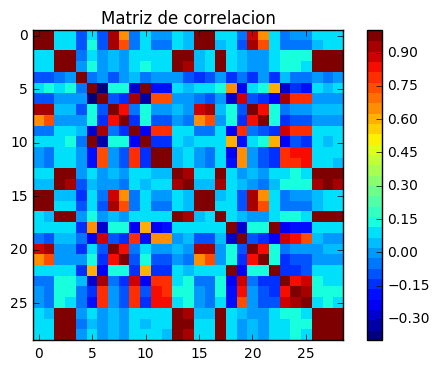

In [81]:
correlation_matrix(pd.DataFrame(tabla_3_imputada))

In [92]:
pd.DataFrame(tabla_3_imputada).head()

0             1             2             3           4   \
0  3.358406e+09  3.637845e+09  1.239080e+09  1.347350e+09  108.320559   
1  2.954188e+09  3.257308e+09  1.089944e+09  1.206410e+09  110.260684   
2  2.743171e+09  3.065955e+09  1.012090e+09  1.135539e+09  111.766847   
3  2.693974e+09  3.050780e+09  9.939385e+08  1.129918e+09  113.244595   
4  2.802259e+09  3.252725e+09  1.033890e+09  1.204713e+09  116.075112   

          5             6             7             8             9   \
0   0.071111  14517.635341  39348.639719  42622.666667  15786.172840   
1 -12.036015  12629.713786  34231.611819  37744.009270  13979.262693   
2  -7.142991  11602.142227  31446.478970  35146.738046  13017.310387   
3  -1.793436  11275.280156  30560.551094  34608.172248  12817.841573   
4   4.019542  11607.745344  31461.665675  36519.163794  13525.616220   

       ...                19             20            21        22       23  \
0      ...       5929.149346  746856.969226  40690.305800  1.462069  14990.0   
1      ...       5929.149346  746856.969226  36154.034762  1.462069  13420.0   
2      ...       5929.149346  746856.969226  34172.090837  1.462069  12620.0   
3      ...       5929.149346  746856.969226  33399.218396  1.462069  12370.0   
4      ...       5929.149346  746856.969226  34970.446508  1.462069  12850.0   

             24       25            26            27            28  
0  12330.943000  23600.0  1.279635e+09  2.727222e+11  2.014452e+09  
1  12330.943000  20760.0  1.158097e+09  2.727222e+11  1.791455e+09  
2  12330.943000  19590.0  1.100878e+09  2.727222e+11  1.709112e+09  
3  19289.693741  19290.0  1.090011e+09  1.700425e+09  1.700425e+09  
4  12330.943000  20060.0  1.144530e+09  2.727222e+11  1.786580e+09  

[5 rows x 29 columns]

In [122]:
pd.DataFrame(np.array(pd.DataFrame(tabla_3_imputada).corr())[:,14])

0
0   0.050954
1   0.037705
2   0.968227
3   0.929578
4  -0.108726
5   0.031861
6   0.014028
7   0.002698
8  -0.060089
9   0.084611
10  0.031092
11  0.076982
12  0.072129
13  0.946126
14  1.000000
15  0.052020
16  0.038579
17  0.931555
18  0.068653
19  0.043914
20  0.003460
21 -0.059671
22  0.068233
23  0.115671
24  0.126002
25  0.119013
26  0.939019
27  0.968988
28  0.946522

In [95]:
pd.DataFrame((correlacion(tabla_3_imputada,15))).head()

0             1           2          3             4   \
0  1.239080e+09  1.347350e+09  108.320559   0.071111  14517.635341   
1  1.089944e+09  1.206410e+09  110.260684 -12.036015  12629.713786   
2  1.012090e+09  1.135539e+09  111.766847  -7.142991  11602.142227   
3  9.939385e+08  1.129918e+09  113.244595  -1.793436  11275.280156   
4  1.033890e+09  1.204713e+09  116.075112   4.019542  11607.745344   

             5             6          7             8             9   \
0  42622.666667  15786.172840  -1.046262  25735.714754  24723.111892   
1  37744.009270  13979.262693 -13.004332  22388.956865  21671.375749   
2  35146.738046  13017.310387  -8.136143  20567.359344  20151.309866   
3  34608.172248  12817.841573  -2.817256  19987.924139  19987.924139   
4  36519.163794  13525.616220   2.948620  20577.292107  20946.700835   

       ...             13           14            15        16       17  \
0      ...       2.619846  5929.149346  40690.305800  1.462069  14990.0   
1      ...       2.619846  5929.149346  36154.034762  1.462069  13420.0   
2      ...       2.619846  5929.149346  34172.090837  1.462069  12620.0   
3      ...       2.619846  5929.149346  33399.218396  1.462069  12370.0   
4      ...       2.619846  5929.149346  34970.446508  1.462069  12850.0   

             18       19            20            21            22  
0  12330.943000  23600.0  1.279635e+09  2.727222e+11  2.014452e+09  
1  12330.943000  20760.0  1.158097e+09  2.727222e+11  1.791455e+09  
2  12330.943000  19590.0  1.100878e+09  2.727222e+11  1.709112e+09  
3  19289.693741  19290.0  1.090011e+09  1.700425e+09  1.700425e+09  
4  12330.943000  20060.0  1.144530e+09  2.727222e+11  1.786580e+09  

[5 rows x 23 columns]

In [ ]:
def splitter_v2(tab,y_indicator):
    from sklearn.model_selection import train_test_split   

    # Asignamos X e y, eliminando los indicadores que se correlacionen más (coeficiente > 0.7)
    X = correlacion(tab,y_indicator)
    y = tab[:,y_indicator]
    
    # Separamos Train y Test respectivamente para X e y
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    return X_train, X_test, y_train, y_test

In [124]:
X = correlacion(tabla_3_imputada[:,:np.shape(tabla)[1]+1],-1)
y = tabla_3_imputada[:,14]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

estimator = DecisionTreeRegressor()
estimator.fit(X_train,y_train)
y_predict = estimator.predict(X_test)
R2_test = r2(y_test,y_predict)

print R2_test

pd.DataFrame((zip(*[y_test,y_predict])), columns=['Test','Predict']).head()

0.998646835337


Test       Predict
0  1.320185e+11  1.320185e+11
1  1.320185e+11  1.320185e+11
2  1.320185e+11  1.320185e+11
3  1.136109e+10  1.165415e+10
4  5.492087e+10  5.192688e+10

In [112]:
pd.DataFrame(X).head()

0             1           2          3             4   \
0  3.358406e+09  3.637845e+09  108.320559   0.071111  14517.635341   
1  2.954188e+09  3.257308e+09  110.260684 -12.036015  12629.713786   
2  2.743171e+09  3.065955e+09  111.766847  -7.142991  11602.142227   
3  2.693974e+09  3.050780e+09  113.244595  -1.793436  11275.280156   
4  2.802259e+09  3.252725e+09  116.075112   4.019542  11607.745344   

             5             6             7          8             9   \
0  39348.639719  42622.666667  15786.172840  -1.046262  25735.714754   
1  34231.611819  37744.009270  13979.262693 -13.004332  22388.956865   
2  31446.478970  35146.738046  13017.310387  -8.136143  20567.359344   
3  30560.551094  34608.172248  12817.841573  -2.817256  19987.924139   
4  31461.665675  36519.163794  13525.616220   2.948620  20577.292107   

             10  
0  24723.111892  
1  21671.375749  
2  20151.309866  
3  19987.924139  
4  20946.700835

In [121]:
pd.DataFrame(tabla_3_imputada[:,:np.shape(tabla)[1]+1]).head()

0             1             2             3           4   \
0  3.358406e+09  3.637845e+09  1.239080e+09  1.347350e+09  108.320559   
1  2.954188e+09  3.257308e+09  1.089944e+09  1.206410e+09  110.260684   
2  2.743171e+09  3.065955e+09  1.012090e+09  1.135539e+09  111.766847   
3  2.693974e+09  3.050780e+09  9.939385e+08  1.129918e+09  113.244595   
4  2.802259e+09  3.252725e+09  1.033890e+09  1.204713e+09  116.075112   

          5             6             7             8             9   \
0   0.071111  14517.635341  39348.639719  42622.666667  15786.172840   
1 -12.036015  12629.713786  34231.611819  37744.009270  13979.262693   
2  -7.142991  11602.142227  31446.478970  35146.738046  13017.310387   
3  -1.793436  11275.280156  30560.551094  34608.172248  12817.841573   
4   4.019542  11607.745344  31461.665675  36519.163794  13525.616220   

          10            11            12            13            14  
0  -1.046262  25735.714754  24723.111892  2.196543e+09  1.320185e+11  
1 -13.004332  22388.956865  21671.375749  1.932167e+09  1.320185e+11  
2  -8.136143  20567.359344  20151.309866  1.794152e+09  1.320185e+11  
3  -2.817256  19987.924139  19987.924139  1.761975e+09  1.320185e+11  
4   2.948620  20577.292107  20946.700835  1.832799e+09  1.320185e+11

In [115]:
pd.DataFrame(y).head()

0
0  2.126183e+13
1  2.126183e+13
2  2.126183e+13
3  2.126183e+13
4  2.126183e+13

In [119]:
pd.DataFrame(tabla_3_imputada[:,14]).head()

0
0  1.320185e+11
1  1.320185e+11
2  1.320185e+11
3  1.320185e+11
4  1.320185e+11

In [139]:
pd.DataFrame(tabla_3_imputada[:,:np.shape(tabla)[1]+1]).head()

0             1             2             3           4   \
0  3.358406e+09  3.637845e+09  1.239080e+09  1.347350e+09  108.320559   
1  2.954188e+09  3.257308e+09  1.089944e+09  1.206410e+09  110.260684   
2  2.743171e+09  3.065955e+09  1.012090e+09  1.135539e+09  111.766847   
3  2.693974e+09  3.050780e+09  9.939385e+08  1.129918e+09  113.244595   
4  2.802259e+09  3.252725e+09  1.033890e+09  1.204713e+09  116.075112   

          5             6             7             8             9   \
0   0.071111  14517.635341  39348.639719  42622.666667  15786.172840   
1 -12.036015  12629.713786  34231.611819  37744.009270  13979.262693   
2  -7.142991  11602.142227  31446.478970  35146.738046  13017.310387   
3  -1.793436  11275.280156  30560.551094  34608.172248  12817.841573   
4   4.019542  11607.745344  31461.665675  36519.163794  13525.616220   

          10            11            12            13            14  
0  -1.046262  25735.714754  24723.111892  2.196543e+09  1.320185e+11  
1 -13.004332  22388.956865  21671.375749  1.932167e+09  1.320185e+11  
2  -8.136143  20567.359344  20151.309866  1.794152e+09  1.320185e+11  
3  -2.817256  19987.924139  19987.924139  1.761975e+09  1.320185e+11  
4   2.948620  20577.292107  20946.700835  1.832799e+09  1.320185e+11

In [137]:
X_1 = correlacion(tabla_3_imputada[:,:np.shape(tabla)[1]+1],12)
pd.DataFrame(X_1).head()

0             1             2             3           4   \
0  3.358406e+09  3.637845e+09  1.239080e+09  1.347350e+09  108.320559   
1  2.954188e+09  3.257308e+09  1.089944e+09  1.206410e+09  110.260684   
2  2.743171e+09  3.065955e+09  1.012090e+09  1.135539e+09  111.766847   
3  2.693974e+09  3.050780e+09  9.939385e+08  1.129918e+09  113.244595   
4  2.802259e+09  3.252725e+09  1.033890e+09  1.204713e+09  116.075112   

          5             6             7          8             9   \
0   0.071111  39348.639719  42622.666667  -1.046262  2.196543e+09   
1 -12.036015  34231.611819  37744.009270 -13.004332  1.932167e+09   
2  -7.142991  31446.478970  35146.738046  -8.136143  1.794152e+09   
3  -1.793436  30560.551094  34608.172248  -2.817256  1.761975e+09   
4   4.019542  31461.665675  36519.163794   2.948620  1.832799e+09   

             10  
0  1.320185e+11  
1  1.320185e+11  
2  1.320185e+11  
3  1.320185e+11  
4  1.320185e+11

In [138]:
X_2 = correlacion(tabla_3_imputada[:,:np.shape(tabla)[1]+1],-1)
pd.DataFrame(X_2).head()

0             1           2          3             4   \
0  3.358406e+09  3.637845e+09  108.320559   0.071111  14517.635341   
1  2.954188e+09  3.257308e+09  110.260684 -12.036015  12629.713786   
2  2.743171e+09  3.065955e+09  111.766847  -7.142991  11602.142227   
3  2.693974e+09  3.050780e+09  113.244595  -1.793436  11275.280156   
4  2.802259e+09  3.252725e+09  116.075112   4.019542  11607.745344   

             5             6             7          8             9   \
0  39348.639719  42622.666667  15786.172840  -1.046262  25735.714754   
1  34231.611819  37744.009270  13979.262693 -13.004332  22388.956865   
2  31446.478970  35146.738046  13017.310387  -8.136143  20567.359344   
3  30560.551094  34608.172248  12817.841573  -2.817256  19987.924139   
4  31461.665675  36519.163794  13525.616220   2.948620  20577.292107   

             10  
0  24723.111892  
1  21671.375749  
2  20151.309866  
3  19987.924139  
4  20946.700835

In [149]:
pd.DataFrame(np.column_stack((tabla_3_imputada[:,:np.shape(tabla)[1]],tabla_3_imputada[:,15]))).head()

0             1             2             3           4   \
0  3.358406e+09  3.637845e+09  1.239080e+09  1.347350e+09  108.320559   
1  2.954188e+09  3.257308e+09  1.089944e+09  1.206410e+09  110.260684   
2  2.743171e+09  3.065955e+09  1.012090e+09  1.135539e+09  111.766847   
3  2.693974e+09  3.050780e+09  9.939385e+08  1.129918e+09  113.244595   
4  2.802259e+09  3.252725e+09  1.033890e+09  1.204713e+09  116.075112   

          5             6             7             8             9   \
0   0.071111  14517.635341  39348.639719  42622.666667  15786.172840   
1 -12.036015  12629.713786  34231.611819  37744.009270  13979.262693   
2  -7.142991  11602.142227  31446.478970  35146.738046  13017.310387   
3  -1.793436  11275.280156  30560.551094  34608.172248  12817.841573   
4   4.019542  11607.745344  31461.665675  36519.163794  13525.616220   

          10            11            12            13            14  
0  -1.046262  25735.714754  24723.111892  2.196543e+09  2.126183e+13  
1 -13.004332  22388.956865  21671.375749  1.932167e+09  2.126183e+13  
2  -8.136143  20567.359344  20151.309866  1.794152e+09  2.126183e+13  
3  -2.817256  19987.924139  19987.924139  1.761975e+09  2.126183e+13  
4   2.948620  20577.292107  20946.700835  1.832799e+09  2.126183e+13

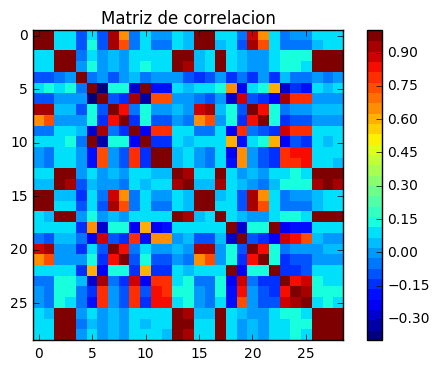

In [151]:
correlation_matrix(pd.DataFrame(tabla_3_imputada))

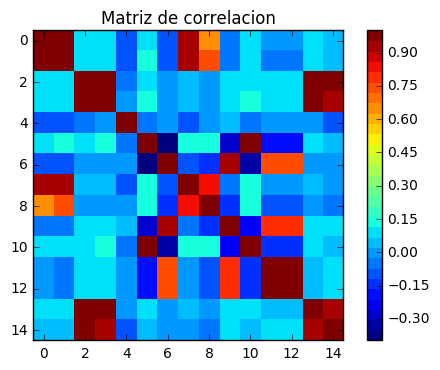

In [140]:
correlation_matrix(pd.DataFrame(tabla_3_imputada[:,:np.shape(tabla)[1]+1]))

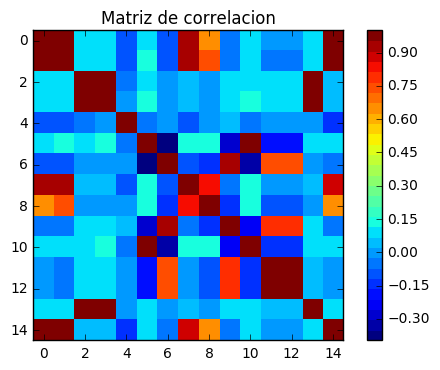

In [150]:
correlation_matrix(pd.DataFrame(np.column_stack((tabla_3_imputada[:,:np.shape(tabla)[1]],tabla_3_imputada[:,15]))))

In [152]:
X = correlacion(np.column_stack((tabla_3_imputada[:,:np.shape(tabla)[1]],tabla_3_imputada[:,15])),-1)
y = tabla_3_imputada[:,15]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

estimator = DecisionTreeRegressor()
estimator.fit(X_train,y_train)
y_predict = estimator.predict(X_test)
R2_test = r2(y_test,y_predict)

print R2_test

pd.DataFrame((zip(*[y_test,y_predict])), columns=['Test','Predict']).head()

0.995657290939


Test       Predict
0  7.518630e+09  7.465858e+09
1  2.126183e+13  2.126183e+13
2  2.136692e+12  2.004773e+12
3  1.299263e+13  1.253667e+13
4  1.338441e+11  1.400292e+11